# Build Model #3 - Polynomial

This approach to building a model will once again incorporate the deeper at each variable before incorporating it into a model. We will attempt to apply higher-order relationships and build a polynomial regression.

In [1]:
# Import libraries and dataframe:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

df_import = pd.read_csv('../CSVs/kc_sorted.csv')

In [2]:
df = df_import.drop(['Unnamed: 0',
 'Unnamed: 0.1',
 'quadrant_1',
 'quadrant_2',
 'quadrant_3',
 'quadrant_4',
 'zip_98039',
 'zip_98004',
 'zip_98112',
 'zip_98040',
 'zip_98102',
 'zip_98199',
 'zip_98109',
 'zip_98105',
 'zip_98119',
 'zip_98115'], axis = 1)

In [3]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'month',
 'year',
 'age',
 'reno_age',
 'multiple_stories',
 'on_water',
 'renovated',
 'has_basement',
 'log_sqft_living',
 'spring',
 'summer',
 'day_of_year',
 'log_price']

In [4]:
# Our adjusted R**2 function:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [5]:
# Our regression results function
def regression_results(y_true, y_pred, terms):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adjr2 = adjustedR2(r2, len(terms), len(terms.columns))
  
    print('r2: ', round(r2,4))
    print('Adjusted r2: ', round(adjr2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [6]:
drops = drops = ['id','price','log_price','date', 'day_of_year', 'lat','long','zipcode']

In [7]:
outcome = 'price'
x_cols = df.drop(drops, axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                     OLS                     Adj. R-squared:            0.618      
Dependent Variable:        price                   AIC:                       603679.3992
Date:                      2020-07-26 14:53        BIC:                       603807.3458
No. Observations:          21953                   Log-Likelihood:            -3.0182e+05
Df Model:                  15                      F-statistic:               2370.      
Df Residuals:              21937                   Prob (F-statistic):        0.00       
R-squared:                 0.618                   Scale:                     5.1257e+10 
-----------------------------------------------------------------------------------------
                     Coef.        Std.Err.      t    P>|t|      [0.025         0.975]    
-----------------------------------------------------------------------------------------
Intercept        -38346734.3999 6724277.8270 -5.7027 0.0000 -51526803.9670 -25166664.8329
spring[T.True]       23451.8985    4376.3765  5.3587 0.0000     14873.8848     32029.9122
summer[T.True]       15925.1662    4567.5069  3.4866 0.0005      6972.5232     24877.8091
bedrooms            -18402.6744    2187.0927 -8.4142 0.0000    -22689.5338    -14115.8150
bathrooms            96359.2752    3472.4765 27.7494 0.0000     89552.9709    103165.5795
view                 53629.1083    2317.9985 23.1360 0.0000     49085.6640     58172.5526
condition            17152.2828    2571.4516  6.6703 0.0000     12112.0521     22192.5135
grade               167397.2738    2150.1775 77.8528 0.0000    163182.7707    171611.7768
yr_built             11015.3363    2224.8249  4.9511 0.0000      6654.5190     15376.1536
month                 3719.9020     944.4401  3.9387 0.0001      1868.7313      5571.0726
year                 25961.8109    4448.9217  5.8355 0.0000     17241.6034     34682.0183
age                  14946.4747    2224.6866  6.7185 0.0000     10585.9285     19307.0209
reno_age             -2745.2075     482.4555 -5.6901 0.0000     -3690.8551     -1799.5599
multiple_stories -38346734.3999 6724277.8270 -5.7027 0.0000 -51526803.9670 -25166664.8329
on_water            606691.7044   19505.2729 31.1040 0.0000    568459.9625    644923.4463
renovated            64411.5138   12125.8926  5.3119 0.0000     40643.8896     88179.1380
has_basement          3687.7415    3430.2238  1.0751 0.2824     -3035.7445     10411.2276
log_sqft_living     137976.3984    7445.5374 18.5314 0.0000    123382.6081    152570.1887
-----------------------------------------------------------------------------------------
Omnibus:                19206.221         Durbin-Watson:            1.957                
Prob(Omnibus):          0.000             Jarque-Bera (JB):         2241909.671          
Skew:                   3.692             Prob(JB):                 0.000                
Kurtosis:               51.953            Condition No.:            121302381641160015872
=========================================================================================
* The condition number is large (1e+20). This might indicate             strong
multicollinearity or other numerical problems.
"""

# Let's build a quick Polynomial model and see if this is a path worth pursuing

In [8]:
y = df['price']
X = df.drop(columns=drops, axis=1)

poly = PolynomialFeatures(4)
X_fin = poly.fit_transform(X)

In [9]:
reg_poly = LinearRegression().fit(X_fin, y)

In [ ]:
print(np.sqrt(mean_squared_error(y, reg_poly.predict(X_fin))))
print(r2_score(y, reg_poly.predict(X_fin)))

## 4 feature model Exploration

In [11]:
# Wow! Okay this is worth looking into - let's split the data set, try some differnt features, and take a closer look at what this is doing: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly = PolynomialFeatures(4)

In [12]:
#Rebuild Model with Training Data:
X_fin_train = poly.fit_transform(X_train)
reg_poly_train = LinearRegression().fit(X_fin_train, y_train)
y_hat_train = reg_poly_train.predict(poly.fit_transform(X_train))
y_hat_train[y_hat_train < 0] = 0

In [13]:
#Build Model with Testing Data:
X_fin_test = poly.fit_transform(X_test)
reg_poly_test = LinearRegression().fit(X_fin_test, y_test)
y_hat_test = reg_poly_test.predict(poly.fit_transform(X_test))
y_hat_test[y_hat_test < 0] = 0

In [14]:
print('Train model results')
regression_results(y_train, y_hat_train, X_train)

Train model results
r2:  0.8132
Adjusted r2:  0.8131
MAE:  113189.2292
MSE:  25459582721.3429
RMSE:  159560.5926


In [15]:
print('Test model results')
regression_results(y_test, y_hat_test, X_test)

Test model results
r2:  0.8311
Adjusted r2:  0.8305
MAE:  110940.2716
MSE:  21262282785.4996
RMSE:  145815.9209


## 3 Feature Model Exploration

In [16]:
y = df['price']
X = df.drop(columns=drops, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly = PolynomialFeatures(3)

In [17]:
#Rebuild Model with Training Data:
X_fin_train = poly.fit_transform(X_train)
reg_poly_train = LinearRegression().fit(X_fin_train, y_train)
y_hat_train = reg_poly_train.predict(poly.fit_transform(X_train))
y_hat_train[y_hat_train < 0] = 0

In [18]:
#Build Model with Testing Data:
X_fin_test = poly.fit_transform(X_test)
reg_poly_test = LinearRegression().fit(X_fin_test, y_test)
y_hat_test = reg_poly_test.predict(poly.fit_transform(X_test))
y_hat_test[y_hat_test < 0] = 0

In [19]:
print('Train model results')
regression_results(y_train, y_hat_train, X_train)

Train model results
r2:  0.7664
Adjusted r2:  0.7662
MAE:  121678.6733
MSE:  31348080532.2176
RMSE:  177053.8916


In [20]:
print('Test model results')
regression_results(y_test, y_hat_test, X_test)

Test model results
r2:  0.8047
Adjusted r2:  0.804
MAE:  114253.6055
MSE:  26263556360.1944
RMSE:  162060.3479


## 2 Feature Model Exploration

In [21]:
y = df['price']
X = df.drop(columns=drops, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly = PolynomialFeatures(2)

In [22]:
#Rebuild Model with Training Data:
X_fin_train = poly.fit_transform(X_train)
reg_poly_train = LinearRegression().fit(X_fin_train, y_train)
y_hat_train = reg_poly_train.predict(poly.fit_transform(X_train))
y_hat_train[y_hat_train < 0] = 0

In [23]:
#Build Model with Testing Data:
X_fin_test = poly.fit_transform(X_test)
reg_poly_test = LinearRegression().fit(X_fin_test, y_test)
y_hat_test = reg_poly_test.predict(poly.fit_transform(X_test))
y_hat_test[y_hat_test < 0] = 0

In [24]:
print('Train model results')
regression_results(y_train, y_hat_train, X_train)

Train model results
r2:  0.7262
Adjusted r2:  0.726
MAE:  128770.7072
MSE:  37374966512.2906
RMSE:  193326.0627


In [25]:
print('Test model results')
regression_results(y_test, y_hat_test, X_train)

Test model results
r2:  0.7102
Adjusted r2:  0.71
MAE:  128082.6195
MSE:  36272985782.8753
RMSE:  190454.6817


Looks like the two feature model is the way to go! 

In [36]:
# Building the final model:
X_fin = poly.fit_transform(X)
reg_poly = LinearRegression().fit(X_fin, y)
y_hat = reg_poly.predict(poly.fit_transform(X))
y_hat[y_hat < 0] = 0

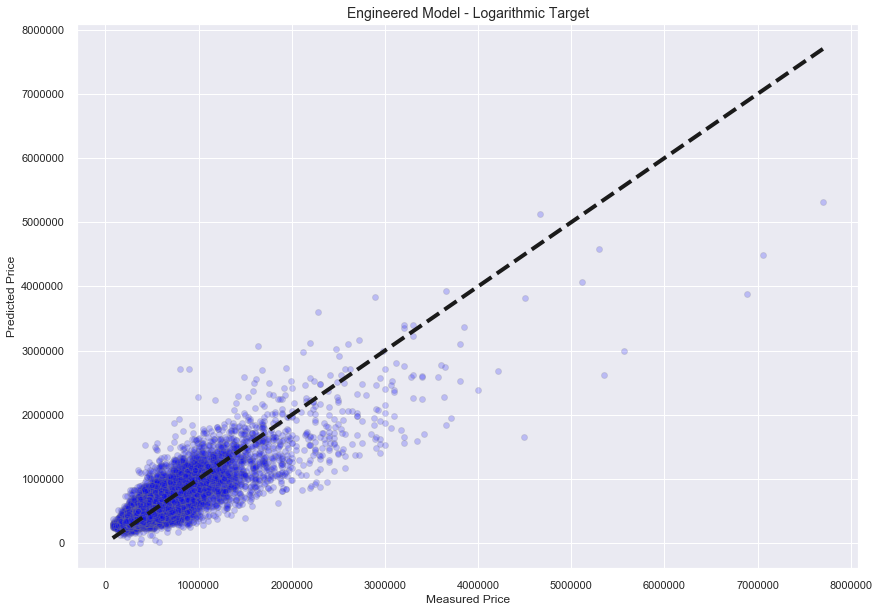

In [37]:
plt.figure(figsize = (14,10))
plt.scatter(y, y_hat, alpha=0.2, color='blue', edgecolors='gray')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.title("Engineered Model - Logarithmic Target", size=14)
plt.show();